# Loading Data
From *.nii.gz* file to *Nifti1 image* with nibabel package <br>
From *Nifti1 image* to *3D/4D Niimg-like object* i.e. Nifti image as it is or dtype with affinate to Dataset conversion.<br>
Finally to *ndarray*. <br>

In [3]:
from nilearn import plotting
from nilearn import image
import nibabel as nib

path = "C:/Users/haris/Desktop/fMRT Datensatz/T1w/Results/rfMRI_REST1_LR/PhaseOne_gdc_dc.nii.gz"
Nifti_img = nib.nifti1.load(path) # Recognizes the File and gives appropriate image. In our case Nifti1-image.
#img = image.load_img(Nifti_img)  # Nifti1 image like object
Dataset = image.get_data(Nifti_img) # ndarray Data from the image object.
# test


In [4]:
print("Data shape: ", Dataset.shape)
print("Data dtype: ", Dataset.dtype)

Data shape:  (260, 311, 260, 3)
Data dtype:  float32


Data from the image object can be accessed via array proxy or via ndarray of numpy.<br>
The array proxy allows us to create the image object without immediately loading all the array data from disk.<br>
Images with an array proxy object like this one are called proxy images.

In [20]:
print(Nifti_img.dataobj) # The data is stored as proxy array.
print(nib.is_proxy(Nifti_img.dataobj)) 

True


*object.__dir__()* prints all attributes of the object.

In [ ]:
Nifti_img.__dir__()

['_header',
 'extra',
 'file_map',
 '_dataobj',
 '_data_cache',
 '_fdata_cache',
 '_affine',
 '_load_cache',
 '__module__',
 '__doc__',
 'header_class',
 'valid_exts',
 'files_types',
 '_get_fileholders',
 'update_header',
 '__annotations__',
 '_meta_sniff_len',
 'rw',
 '_dtype_alias',
 '__init__',
 '_affine2header',
 'get_qform',
 'set_qform',
 'get_sform',
 'set_sform',
 'set_data_dtype',
 'get_data_dtype',
 'to_file_map',
 'as_reoriented',
 '_compressed_suffixes',
 'makeable',
 'ImageArrayProxy',
 'from_file_map',
 'ImageSlicer',
 'affine',
 '__str__',
 'from_image',
 'slicer',
 '__getitem__',
 'orthoview',
 'dataobj',
 'get_data',
 'get_fdata',
 'in_memory',
 'uncache',
 'shape',
 'ndim',
 'from_filename',
 'load',
 'header',
 'get_filename',
 'set_filename',
 'filespec_to_file_map',
 'to_filename',
 'make_file_map',
 'instance_to_filename',
 '_sniff_meta_for',
 'path_maybe_image',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__getattribute__',
 '__setattr__

affine gives the relating array coordinates from the image data array to coordinates in some RAS+ world coordinate system.

In [ ]:
Nifti_img.affine # (4,4) tuple

array([[  -0.69999999,    0.        ,    0.        ,   90.        ],
       [   0.        ,    0.69999999,    0.        , -126.        ],
       [   0.        ,    0.        ,    0.69999999,  -72.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

Header Attribute of image class gives metadata about our file. i.e. the information about our image object.

In [ ]:
hdr = Nifti_img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 260 311 260   3   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    0.7   0.7   0.7   7.06  0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-0.7  

*get_zooms* attribute of the image object gives the voxel sizes in millimeters. <br>
The last value of the output is the time between the scans in milliseconds. 

In [ ]:
hdr.get_zooms() 

(0.7, 0.7, 0.7, 7.06)

***

*Image object* <---------> *object ndarray*<br>
The image object can be created from object ndarray and vice versa<br>
In case of creating image object from ndimage array _get_fdata()_ function is used. which expects floating point type(default 64-bit float). If it isn’t that type, get_fdata() casts it to one. The cast to floating point means the array is not the one attached to the image.

In [ ]:
import numpy as np
image_data = Nifti_img.get_fdata()
print(image_data.dtype == np.dtype(np.float64)) #casted data from image.
print(image_data is Nifti_img.dataobj) # the nddata array is not attached to dataobj attribute of image.

True
False


Example of no casting

In [ ]:
farray_img = nib.Nifti1Image(image_data.astype(np.float64), Nifti_img.affine)
farray_data = farray_img.get_fdata()
print(farray_data.dtype == np.dtype(np.float64))
print(farray_data is farray_img.dataobj)

True
True


***

The slicer operation of the image object produce a same result as any numpy array reduction. However, unused data did not need to be loaded into memory or scaled. Additionally, the image affine was adjusted so that the X-translation is 32 voxels (32*0.7mm = 24mm) less. <br>
Another use for the slicer object is to choose specific volumes from a time series.

In [ ]:
cropped_img = Nifti_img.slicer[32:-32, ...]
print(np.array_equal(cropped_img.get_fdata(), Nifti_img.get_fdata()[32:-32, ...])) 
Nifti_img.affine - cropped_img.affine

True


array([[ 0.        ,  0.        ,  0.        , 22.39999962],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
raw = hdr.structarr
raw['xyzt_units']


array(10, dtype=uint8)

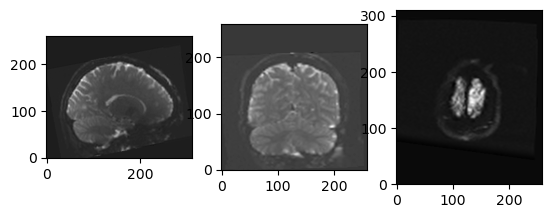

In [ ]:
show_slices([Dataset[150, :, :, 1],
             Dataset[:, 100, :, 1],
             Dataset[:, :, 200, 1]])

Text(0.5, 0.98, 'Center slices for EPI image')

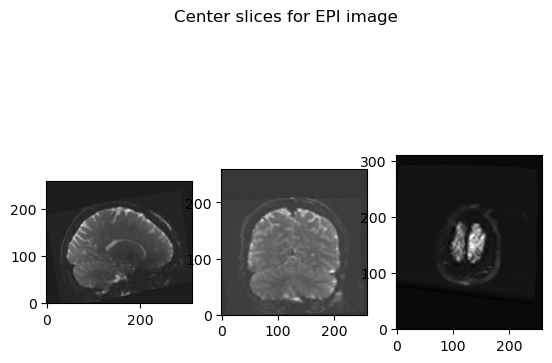

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = Dataset[150, :, :, 1]
slice_1 = Dataset[:, 100, :, 1]
slice_2 = Dataset[:, :, 200, 1]
#slice_3 = Dataset[:, :, :, 2]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

In [17]:
time_point = 2
Data_slice = Dataset[1, :, :, time_point]
print(Data_slice.shape)


(311, 260)


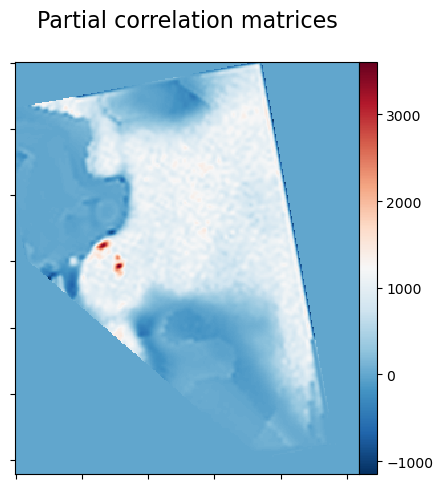

In [18]:
title = "Partial correlation matrices\n"
display = plotting.plot_matrix(Data_slice, colorbar=True, title=title)
plotting.show()

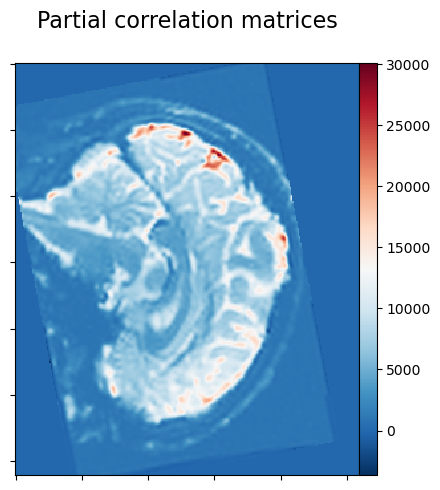

In [19]:
display = plotting.plot_matrix(Dataset[130, :, :, 2], colorbar=True, title=title) # (260, 311, 260, 3)
plotting.show()

In [ ]:
img_sliced = img.slicer()
plotting.plot_stat_map(img[0], threshold=3)

NameError: name 'img' is not defined